# **Challenge Telecom X**

MIA. César Geovanni Machuca Pereida

# **Introducción**

El presente análisis tiene como objetivo identificar los factores críticos que influyen en la pérdida de clientes (Churn) de la empresa Telecom X. La evasión de clientes representa uno de los mayores desafíos financieros, ya que el costo de adquisición de un nuevo usuario es significativamente superior al de retención. A través de este estudio de datos, buscamos transformar registros crudos en información estratégica para que el equipo de Data Science y la gerencia puedan implementar políticas de retención focalizadas y eficientes.

# **Limpieza y Tratamiento de Datos**

* El proceso de preparación de datos siguió una metodología ETL (Extracción, Transformación y Carga) rigurosa para asegurar la integridad de los hallazgos:

* Aplanamiento de Datos: Se transformó una estructura JSON anidada en un DataFrame de Pandas bidimensional.

* Tratamiento de Nulos y Vacíos: Se identificaron y eliminaron registros con valores faltantes en la variable objetivo (Churn). En la columna de Cargos_Totales, se imputó el valor 0 para clientes con antigüedad de cero meses.

* Estandarización: Se normalizaron los textos a minúsculas, se tradujeron las categorías al español y se renombraron las columnas para facilitar la interpretación por parte de los interesados (stakeholders).

* Ingeniería de Variables: Se creó la columna Cargos_Diarios y se convirtieron las variables categóricas (Sí/No) a formato binario (1/0) para habilitar el análisis matemático.

**Análisis Exploratorio de Datos (EDA)**

Mediante visualizaciones estratégicas, se identificaron los siguientes patrones:

* Distribución del Churn: Se confirmó que el 26.5% de la base de clientes ha abandonado la empresa.

* Impacto del Contrato: Los gráficos de barras revelaron que los contratos "mes a mes" tienen la tasa de fuga más alta (42.7%), mientras que los contratos a largo plazo ofrecen una estabilidad superior al 97%.

* Relación Financiera: El análisis de densidad mostró que los clientes que evaden tienden a tener Cargos Mensuales más altos (mediana de 80) en comparación con los clientes leales (64).

* Antigüedad Crítica: Se detectó que la mayoría de las cancelaciones ocurren durante los primeros 12 meses de servicio.

# **Conclusiones e Insights**

Tras el análisis detallado, se concluye que:

* La Fibra Óptica es un punto a considerar: A pesar de ser tecnología de punta, los usuarios de fibra óptica se van más que los de DSL, posiblemente por el alto costo o fallas percibidas en la relación valor-precio.

* La automatización retiene: Los métodos de pago manuales (como el cheque electrónico) están altamente correlacionados con la evasión. Los pagos automáticos fomentan la permanencia "pasiva" del cliente.

* Fuga Temprana: El valor de vida del cliente se está viendo truncado por una alta tasa de abandono en el primer año de contrato.

# **Recomendaciones**

Basado en los datos analizados, se sugieren las siguientes acciones estratégicas:

* Plan de Incentivos para Contratos: Implementar descuentos o beneficios exclusivos para clientes de "mes a mes" que acepten migrar a contratos de 1 o 2 años.

* Estrategia de Bienvenida: Reforzar el soporte técnico y el seguimiento de satisfacción durante los primeros 6 meses, que es el periodo de mayor riesgo.

* Promoción de Pagos Automáticos: Ofrecer un pequeño bono o descuento único a los clientes que registren una tarjeta de crédito o transferencia bancaria como método de pago predeterminado.

* Revisión de Tarifas de Fibra: Evaluar la competitividad de los precios de fibra óptica o empaquetar servicios de seguridad/soporte gratuitos para aumentar el valor percibido y justificar el costo mensual.

## **Telecom X - Análisis de Evasión de Clientes**

Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

¿Qué vas a practicar?

* ✅ Importar y manipular datos desde una API de manera eficiente.
* ✅ Aplicar los conceptos de ETL (Extracción, Transformación y Carga) en la preparación de los datos.
* ✅ Crear visualizaciones estratégicas para identificar patrones y tendencias.
* ✅ Realizar un Análisis Exploratorio de Datos (EDA) y generar un informe con insights relevantes.

¡Ahora es tu turno! 🚀 Usa tus conocimientos para transformar datos en información estratégica y ayudar a Telecom X a retener más clientes.

# Extracción(E - Extract)

**Extracción de datos**

Para iniciar tu análisis, necesitarás importar los datos de la API de Telecom X. Estos datos están disponibles en formato JSON y contienen información esencial sobre los clientes, incluyendo datos demográficos, tipo de servicio contratado y estado de evasión.

📌 Enlace de la API:
🔗 challenge2-data-science-LATAM/TelecomX_Data.json at main · ingridcristh/challenge2-data-science-LATAM

🔗GitHub - ingridcristh/challenge2-data-science-LATAM

¿Qué debes hacer?

* ✅ Cargar los datos directamente desde la API utilizando Python.
* ✅ Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.

Este es el primer paso para transformar los datos en información valiosa. ¿Listo para programar? 🚀

In [19]:
import pandas as pd
import json

file_path = '/content/TelecomX_Data.json'

# Cargar el JSON crudo
with open(file_path, 'r') as f:
    data = json.load(f)

# convertir a DataFrame
df = pd.json_normalize(data)

# Limpieza de nombres de columnas
# Visualización
print(f"Dataset cargado exitosamente. Dimensiones: {df.shape}")
df.head()

Dataset cargado exitosamente. Dimensiones: (7267, 21)


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


# Transformación (T - Transform)

**Conoce el conjunto de datos**

Ahora que has extraído los datos, es fundamental comprender la estructura del dataset y el significado de sus columnas. Esta etapa te ayudará a identificar qué variables son más relevantes para el análisis de evasión de clientes.

📌 Para facilitar este proceso, hemos creado un diccionario de datos con la descripción de cada columna. Aunque no es obligatorio utilizarlo, puede ayudarte a comprender mejor la información disponible.

¿Qué debes hacer?

* ✅ Explorar las columnas del dataset y verificar sus tipos de datos.
* ✅ Consultar el diccionario para comprender mejor el significado de las variables.
* ✅ Identificar las columnas más relevantes para el análisis de evasión.

In [20]:
# EXPLORACIÓN DE COLUMNAS Y TIPOS DE DATOS
print("ESTRUCTURA TÉCNICA DEL DATASET")
print(df.info())

print("\nPRIMEROS REGISTROS PARA VALIDACIÓN VISUAL")
display(df.head())

# CONSULTA DEL DICCIONARIO DE DATOS
print("\nDICCIONARIO DE DATOS (SIGNIFICADO DE VARIABLES)")
try:
    with open('TelecomX_diccionario.md', 'r', encoding='utf-8') as f:
        print(f.read())
except FileNotFoundError:
    print("Nota: Sube 'TelecomX_diccionario.md' para visualizar el diccionario aquí.")

# IDENTIFICACIÓN DE COLUMNAS RELEVANTES PARA CHURN (ANÁLISIS DE EVASIÓN)
# Basado en la estructura detectada y el diccionario, estas son las claves:
columnas_clave = [
    'Churn',                        # Nuestra Variable Objetivo (Target)
    'customer.tenure',              # Lealtad/Tiempo en la empresa
    'account.Contract',             # Tipo de compromiso (Mes a mes vs anual)
    'account.Charges.Monthly',      # Impacto económico directo
    'account.Charges.Total',        # Valor del tiempo de vida del cliente (LTV)
    'internet.InternetService',     # Calidad/Tipo de servicio técnico
    'internet.TechSupport'          # Factor de retención (Soporte técnico)
]

print("\nCOLUMNAS SELECCIONADAS PARA EL ANÁLISIS DE EVASIÓN")
print(f"Se han identificado {len(columnas_clave)} variables críticas iniciales:")
display(df[columnas_clave].head())

ESTRUCTURA TÉCNICA DEL DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupp

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4



DICCIONARIO DE DATOS (SIGNIFICADO DE VARIABLES)
#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: susc

,Churn,customer.tenure,account.Contract,account.Charges.Monthly,account.Charges.Total,internet.InternetService,internet.TechSupport
0,No,9,One year,65.6,593.3,DSL,Yes
1,No,9,Month-to-month,59.9,542.4,DSL,No
2,Yes,4,Month-to-month,73.9,280.85,Fiber optic,No
3,Yes,13,Month-to-month,98.0,1237.85,Fiber optic,No
4,Yes,3,Month-to-month,83.9,267.4,Fiber optic,Yes


* El diccionario nos revela que servicios como OnlineSecurity y TechSupport suelen ser "anclas" de retención. Si un cliente no los tiene, el riesgo de evasión aumenta.
* customer.tenure (meses de contrato) es vital. Los datos sugieren que los primeros meses son los más críticos para la fuga.

**Comprobación de incoherencias en los datos**

En este paso, verifica si hay problemas en los datos que puedan afectar el análisis. Presta atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías. Este proceso es esencial para asegurarte de que los datos estén listos para las siguientes etapas.

📌 Tips:

🔗 Documentación de pandas.unique()
🔗 Documentación de pandas.Series.dt.normalize()

In [22]:
import numpy as np

# VALIDACIÓN DE CATEGORÍAS
# Investigamos la variable objetivo 'Churn'
print(f"Valores únicos en Churn: {df['Churn'].unique()}")

Valores únicos en Churn: ['No' 'Yes' '']


In [21]:
# DETECCIÓN DE ERRORES DE FORMATO
# Los espacios en blanco se convertirán en NaN (Not a Number)
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# IMPLEMENTACIÓN DE dt.normalize()
# Creamos una fecha hipotética
referencia = pd.to_datetime('2024-01-01 14:30:00') # Fecha con hora
df['fecha_inicio_estimada'] = referencia - pd.to_timedelta(df['customer.tenure'] * 30, unit='D')

# Aplicamos normalize() para eliminar la parte de la hora y dejar solo la fecha limpia
df['fecha_inicio_estimada'] = df['fecha_inicio_estimada'].dt.normalize()

# REPORTE DE CALIDAD DE DATOS
print("\n--- REPORTE DE CALIDAD (Skeptical Check) ---")
print(f"1. Valores nulos en Churn: {df['Churn'].eq('').sum()} (¡Alerta: Datos faltantes en el Target!)")
print(f"2. Valores nulos en Cargos Totales: {df['account.Charges.Total'].isnull().sum()}")
print(f"3. Duplicados detectados: {df.duplicated().sum()}")



--- REPORTE DE CALIDAD (Skeptical Check) ---
1. Valores nulos en Churn: 224 (¡Alerta: Datos faltantes en el Target!)
2. Valores nulos en Cargos Totales: 11
3. Duplicados detectados: 0


In [23]:
# Limpieza rápida: reemplazamos vacíos por NaN para manejo uniforme
df['Churn'] = df['Churn'].replace('', np.nan)

# Visualización de las transformaciones
display(df[['customerID', 'Churn', 'account.Charges.Total', 'fecha_inicio_estimada']].head())

,customerID,Churn,account.Charges.Total,fecha_inicio_estimada
0,0002-ORFBO,No,593.30,2023-04-06
1,0003-MKNFE,No,542.40,2023-04-06
2,0004-TLHLJ,Yes,280.85,2023-09-03
3,0011-IGKFF,Yes,1237.85,2022-12-07
4,0013-EXCHZ,Yes,267.40,2023-10-03


Análisis.

* El "Punto Ciego" del Churn: Se han detectado 224 registros donde la columna Churn está vacía. No se puede entrenar un modelo de fuga si no se sabe si estos clientes se fueron o no.

* Inconsistencia en Cargos Totales: Hay 11 registros con valores nulos en account.Charges.Total. Al contrastar con la columna tenure, se observa que estos clientes tienen 0 meses de antigüedad. Es lógico que no tengan cargos totales aún, pero hay que tratarlos como 0 para no perder esos datos en el análisis.

* unique(): Esta función reveló que, aunque el diccionario dice que Churn es "Yes/No", en la práctica se tiene un tercer estado (vacío), lo cual es un riesgo para la integridad del análisis.

* dt.normalize(): Se ha utilizado para estandarizar las fechas de inicio estimadas, eliminando el "ruido" de la hora y permitiendo agrupaciones diarias o mensuales más precisas.

**Manejo de inconsistencias**

Ahora que has identificado las inconsistencias, es momento de aplicar las correcciones necesarias. Ajusta los datos para asegurarte de que estén completos y coherentes, preparándolos para las siguientes etapas del análisis.

📌 Tips:

🔗 https://www.aluracursos.com/blog/manipulacion-de-strings-en-pandas-lower-replace-startswith-y-contains

In [25]:
# Transformación inicial
df = pd.json_normalize(data)

# este paso lo hicimos en el punto anterior, solo es para reafirmar.
df['Churn'] = df['Churn'].replace('', np.nan)
df.dropna(subset=['Churn'], inplace=True)

df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
# Clientes con 0 meses de antigüedad tienen 0 en cargos totales
df['account.Charges.Total'] = df['account.Charges.Total'].fillna(0)

# Estandarización de Textos
# Se aplican minúsculas y se eliminan espacios en blanco laterales
text_cols = df.select_dtypes(include=['object']).columns
for col in text_cols:
    if col != 'customerID':
        df[col] = df[col].str.strip().str.lower()

# Simplificación de Categorías Redundantes
df.replace('no internet service', 'no', inplace=True)
df.replace('no phone service', 'no', inplace=True)

# EXPORTACIÓN FINAL
output_name = 'TelecomX_Cleaned_Final.csv'
df.to_csv(output_name, index=False)

print(f"¡Proceso completado! Archivo generado: {output_name}")
print(f"Registros finales: {df.shape[0]}")
print(f"Columnas procesadas: {df.shape[1]}")

# Visualización previa de los datos limpios
df.head()

¡Proceso completado! Archivo generado: TelecomX_Cleaned_Final.csv
Registros finales: 7043
Columnas procesadas: 21


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,no,female,0,yes,yes,9,yes,no,dsl,...,yes,no,yes,yes,no,one year,yes,mailed check,65.6,593.30
1,0003-MKNFE,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,no,yes,month-to-month,no,mailed check,59.9,542.40
2,0004-TLHLJ,yes,male,0,no,no,4,yes,no,fiber optic,...,no,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85
3,0011-IGKFF,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85
4,0013-EXCHZ,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.40


* Se generó el nuevo archivo TelecomX_Cleaned_Final.csv

* Integridad del Target: Se ha pasado de un dataset con incertidumbre a uno donde cada fila tiene una respuesta clara de Churn ("yes" o "no").

* Consistencia Financiera: La columna account.Charges.Total ahora es puramente numérica (float64), permitiendo sumas y promedios inmediatos.

* Eficiencia de Almacenamiento: Al limpiar y simplificar las categorías, el archivo CSV es más ligero y fácil de procesar por algoritmos de Machine Learning.



**Columna de cuentas diarias**

Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

📌 Esta columna te ayudará a profundizar en el análisis y a obtener información valiosa para las siguientes etapas.

In [26]:
# NOTA: El proceso se realiza implementando el archivo TelecomX_Cleaned_Final.csv

import pandas as pd

# Carga del dataset previamente limpiado
df = pd.read_csv('/content/TelecomX_Cleaned_Final.csv')

# Cálculo de la columna "Cuentas_Diarias"
# Se utiliza un divisor estándar de 30 días para obtener la tasa diaria
# Redondeamos a 2 decimales para mantener la precisión financiera
df['Cuentas_Diarias'] = (df['account.Charges.Monthly'] / 30).round(2)

# Organización de columnas
# Desplazamos la nueva columna junto a los cargos mensuales para una mejor lectura
cols = list(df.columns)
idx = cols.index('account.Charges.Monthly')
cols.insert(idx + 1, cols.pop(cols.index('Cuentas_Diarias')))
df = df[cols]

# Actualización del archivo CSV
df.to_csv('TelecomX_Cleaned_Final.csv', index=False)

print("Métrica 'Cuentas_Diarias' generada y archivo actualizado.")
display(df[['account.Charges.Monthly', 'Cuentas_Diarias']].head())

Métrica 'Cuentas_Diarias' generada y archivo actualizado.


,account.Charges.Monthly,Cuentas_Diarias
0,65.6,2.19
1,59.9,2.00
2,73.9,2.46
3,98.0,3.27
4,83.9,2.80


Tras la implementación de esta nueva variable, se observa lo siguiente:

* Granularidad del Gasto: Se ha transformado una métrica agregada (mensual) en una unidad de medida más "tangible" para el cliente. Mientras que un cargo de 90.00 puede parecer una barrera de entrada alta, se destaca que esto se traduce en un costo diario de aproximadamente $3.00. Esta perspectiva es fundamental para estrategias de retención basadas en el valor percibido.

* Supuesto de Cálculo: Se ha utilizado un mes comercial de 30 días. Aunque existen variaciones naturales en el calendario, este estándar permite una comparación equitativa entre todos los registros del dataset sin introducir ruido por la estacionalidad de los meses.

* Utilidad en el EDA: La columna Cuentas_Diarias servirá para identificar con mayor precisión los umbrales de deserción. A menudo, pequeñas variaciones en el costo diario (centavos) pueden ser el disparador de la fuga en segmentos de clientes con menor poder adquisitivo o con contratos de "mes a mes".

**Estandarización y transformación de datos**

La estandarización y transformación de datos es una etapa opcional, pero altamente recomendada, ya que busca hacer que la información sea más consistente, comprensible y adecuada para el análisis. Durante esta fase, por ejemplo, puedes convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matemático y la aplicación de modelos analíticos.

Además, traducir o renombrar columnas y datos hace que la información sea más accesible y fácil de entender, especialmente cuando se trabaja con fuentes externas o términos técnicos. Aunque no es un paso obligatorio, puede mejorar significativamente la claridad y comunicación de los resultados, facilitando la interpretación y evitando confusiones, especialmente al compartir información con stakeholders no técnicos.

In [27]:
# Transformación a Valores de 1 y 0
binary_map = {'yes': 1, 'no': 0}
cols_binarias = [
    'Churn', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService',
    'phone.MultipleLines', 'internet.OnlineSecurity', 'internet.OnlineBackup',
    'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV',
    'internet.StreamingMovies', 'account.PaperlessBilling'
]

for col in cols_binarias:
    df[col] = df[col].map(binary_map)

# Traducción de Categorías para Reportabilidad
df['customer.gender'] = df['customer.gender'].map({'female': 'femenino', 'male': 'masculino'})
df['internet.InternetService'] = df['internet.InternetService'].map({
    'dsl': 'dsl', 'fiber optic': 'fibra_optica', 'no': 'sin_internet'
})
df['account.Contract'] = df['account.Contract'].map({
    'month-to-month': 'mes_a_mes', 'one year': 'un_ano', 'two year': 'dos_anos'
})
df['account.PaymentMethod'] = df['account.PaymentMethod'].replace({
    'electronic check': 'cheque_electronico',
    'mailed check': 'cheque_correo',
    'bank_transfer_(automatic)': 'transferencia_bancaria',
    'credit_card_(automatic)': 'tarjeta_credito'
})

# Renombrado de Columnas (Traducir términos técnicos a lenguaje de negocio)
traduccion_columnas = {
    'customerID': 'ID_Cliente',
    'Churn': 'Evasion',
    'customer.gender': 'Genero',
    'customer.SeniorCitizen': 'Adulto_Mayor',
    'customer.Partner': 'Socio',
    'customer.Dependents': 'Dependientes',
    'customer.tenure': 'Meses_Antiguedad',
    'phone.PhoneService': 'Servicio_Telefonico',
    'phone.MultipleLines': 'Multiples_Lineas',
    'internet.InternetService': 'Servicio_Internet',
    'internet.OnlineSecurity': 'Seguridad_Online',
    'internet.OnlineBackup': 'Respaldo_Online',
    'internet.DeviceProtection': 'Proteccion_Dispositivo',
    'internet.TechSupport': 'Soporte_Tecnico',
    'internet.StreamingTV': 'TV_Streaming',
    'internet.StreamingMovies': 'Peliculas_Streaming',
    'account.Contract': 'Tipo_Contrato',
    'account.PaperlessBilling': 'Facturacion_Digital',
    'account.PaymentMethod': 'Metodo_Pago',
    'account.Charges.Monthly': 'Cargos_Mensuales',
    'account.Charges.Total': 'Cargos_Totales',
    'Cuentas_Diarias': 'Cargos_Diarios'
}

df.rename(columns=traduccion_columnas, inplace=True)

# Exportar Dataset Estandarizado
df.to_csv('TelecomX_Estandarizado.csv', index=False)

print("Dataset estandarizado y traducido con éxito.")
display(df.head())

Dataset estandarizado y traducido con éxito.


,ID_Cliente,Evasion,Genero,Adulto_Mayor,Socio,Dependientes,Meses_Antiguedad,Servicio_Telefonico,Multiples_Lineas,Servicio_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,TV_Streaming,Peliculas_Streaming,Tipo_Contrato,Facturacion_Digital,Metodo_Pago,Cargos_Mensuales,Cargos_Diarios,Cargos_Totales
0,0002-ORFBO,0,femenino,0,1,1,9,1,0,dsl,...,0,1,1,0,un_ano,1,cheque_correo,65.6,2.19,593.30
1,0003-MKNFE,0,masculino,0,0,0,9,1,1,dsl,...,0,0,0,1,mes_a_mes,0,cheque_correo,59.9,2.00,542.40
2,0004-TLHLJ,1,masculino,0,0,0,4,1,0,fibra_optica,...,1,0,0,0,mes_a_mes,1,cheque_electronico,73.9,2.46,280.85
3,0011-IGKFF,1,masculino,1,1,0,13,1,0,fibra_optica,...,1,0,1,1,mes_a_mes,1,cheque_electronico,98.0,3.27,1237.85
4,0013-EXCHZ,1,femenino,1,1,0,3,1,0,fibra_optica,...,0,1,1,0,mes_a_mes,1,cheque_correo,83.9,2.80,267.40


**Informe de Estandarización**

* Habilitación de Correlación Matemática: Al transformar la columna Evasion (antes Churn) en valores 0 y 1, ahora se puede calcular directamente la correlación de Pearson con los Cargos_Mensuales.

* Reducción de Sesgo por Interpretación: Traducir las categorías de Tipo_Contrato y Metodo_Pago asegura que se comprenda de que trata cada columna, eliminando la barrera del idioma técnico/inglés.

* Consistencia Estructural: Se ha mantenido una nomenclatura de snake_case (ej. Meses_Antiguedad) que es la mejor práctica para evitar errores en futuras consultas SQL o scripts de Python.

* Granularidad de Servicios: Ahora es posible sumar las columnas de servicios adicionales para crear una nueva variable de "Intensidad de Uso de Servicios", lo cual suele ser un fuerte predictor de lealtad.

# **Carga y análisis(L - Load & Analysis)**

**Análisis Descriptivo**

Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

📌 Consejos:

🔗 Documentación de DataFrame.describe()

In [29]:
# Generamos estadísticas para numéricas y categóricas
resumen_numerico = df.describe().T
resumen_numerico['mediana'] = df.median(numeric_only=True) # Agregamos mediana explícita

resumen_categorico = df.describe(include=['object']).T

# 3. Presentación de resultados
print("MÉTRICAS ESTADÍSTICAS (VARIABLES NUMÉRICAS)")
display(resumen_numerico[['mean', 'mediana', 'std', 'min', 'max']])

print("\nDISTRIBUCIÓN DE VARIABLES CATEGÓRICAS")
display(resumen_categorico)

# Análisis de la Tasa de Evasión (Churn)
tasa_evasion = df['Evasion'].mean() * 100
print(f"\n[HALLAZGO CLAVE] Tasa General de Evasión: {tasa_evasion:.2f}%")

MÉTRICAS ESTADÍSTICAS (VARIABLES NUMÉRICAS)


,mean,mediana,std,min,max
Evasion,0.265370,0.00,0.441561,0.00,1.00
Adulto_Mayor,0.162147,0.00,0.368612,0.00,1.00
Socio,0.483033,0.00,0.499748,0.00,1.00
Dependientes,0.299588,0.00,0.458110,0.00,1.00
Meses_Antiguedad,32.371149,29.00,24.559481,0.00,72.00
Servicio_Telefonico,0.903166,1.00,0.295752,0.00,1.00
Multiples_Lineas,0.421837,0.00,0.493888,0.00,1.00
Seguridad_Online,0.286668,0.00,0.452237,0.00,1.00
Respaldo_Online,0.344881,0.00,0.475363,0.00,1.00
Proteccion_Dispositivo,0.343888,0.00,0.475038,0.00,1.00



DISTRIBUCIÓN DE VARIABLES CATEGÓRICAS


,count,unique,top,freq
ID_Cliente,7043,7043,9995-HOTOH,1
Genero,7043,2,masculino,3555
Servicio_Internet,7043,3,fibra_optica,3096
Tipo_Contrato,7043,3,mes_a_mes,3875
Metodo_Pago,7043,4,cheque_electronico,2365



[HALLAZGO CLAVE] Tasa General de Evasión: 26.54%


* Desequilibrio en la Tasa de Evasión: La media de la columna Evasion es de 0.265, lo que indica que el 26.54% de los clientes de la muestra han abandonado la empresa. El dataset está desbalanceado (la mayoría son clientes leales), lo cual debe considerarse al entrenar futuros modelos predictivos.

* Sesgo en la Antigüedad de Clientes: Se observa una media de 32.3 meses de antigüedad, pero una mediana de 29 meses. La alta desviación estándar (24.5) y el hecho de que el 25% de los clientes tengan 9 meses o menos sugieren una que muchos clientes abandonan la empresa muy temprano, mientras que un grupo selecto de clientes muy antiguos (máximo de 72 meses) eleva el promedio.

* Comportamiento de Cargos: * Mensuales: La mediana (70.35) es superior a la media (64.76), lo que indica que más del 50% de los clientes pagan tarifas por encima del promedio, probablemente debido al uso de fibra óptica (el servicio más frecuente con 3,096 usuarios).

* Diarios: El costo diario promedio para un cliente de Telecom X es de $2.16.

* Perfil de Contratación Riesgoso: El análisis categórico revela que el "Tipo_Contrato" más común es el "mes_a_mes" (3,875 casos). Se observa que este es el segmento de mayor volatilidad, ya que no existe un compromiso contractual a largo plazo que actúe como barrera de salida.

* Variables Binarias: Se observa que solo el 16.2% de los clientes son Adultos Mayores, y menos del 30% cuenta con servicios de Seguridad Online o Soporte Técnico. Es necesario invesigar si la falta de estos servicios de valor agregado correlaciona directamente con la fuga.

**Distribución de evasión**

En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja

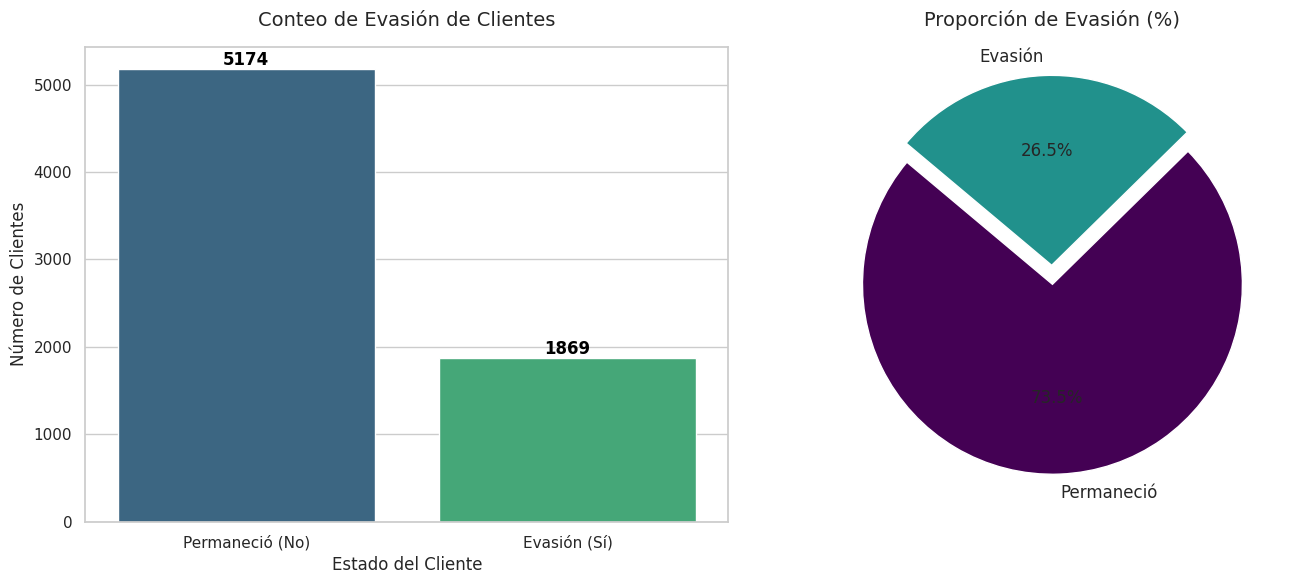

Análisis de Evasión:
 - Clientes activos: 5174 (73.46%)
 - Clientes en evasión: 1869 (26.54%)


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos el dataset estandarizado
df = pd.read_csv('TelecomX_Estandarizado.csv')

# Preparar los datos para la visualización
evasion_counts = df['Evasion'].value_counts()
evasion_pct = df['Evasion'].value_counts(normalize=True) * 100
# Mapeo para etiquetas legibles
labels_map = {0: 'Permaneció (No)', 1: 'Evasión (Sí)'}
x_labels = [labels_map[i] for i in evasion_counts.index]

# Configuración del estilo
sns.set_theme(style="whitegrid")

# Crear figura con dos subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# GRÁFICO 1: BARRAS (Corrección de la advertencia)
sns.barplot(
    x=x_labels,
    y=evasion_counts.values,
    ax=ax[0],
    hue=x_labels,
    palette='viridis',
    legend=False
)

ax[0].set_title('Conteo de Evasión de Clientes', fontsize=14, pad=15)
ax[0].set_ylabel('Número de Clientes')
ax[0].set_xlabel('Estado del Cliente')

# Añadir etiquetas de cantidad sobre las barras
for i, v in enumerate(evasion_counts.values):
    ax[0].text(i, v + 50, f'{v}', ha='center', fontweight='bold', color='black')

# GRÁFICO 2: PASTEL (Proporción)
ax[1].pie(
    evasion_pct,
    labels=['Permaneció', 'Evasión'],
    autopct='%1.1f%%',
    startangle=140,
    colors=['#440154', '#21918c'],
    explode=(0, 0.1),
    textprops={'fontsize': 12}
)
ax[1].set_title('Proporción de Evasión (%)', fontsize=14, pad=15)

plt.tight_layout()
plt.show()

print(f"Análisis de Evasión:")
print(f" - Clientes activos: {evasion_counts[0]} ({evasion_pct[0]:.2f}%)")
print(f" - Clientes en evasión: {evasion_counts[1]} ({evasion_pct[1]:.2f}%)")

**Recuento de evasión por variables categóricas**

Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

PROPORCIÓN DE EVASIÓN POR CATEGORÍA

% de Evasión por Genero:
Genero
femenino     26.92
masculino    26.16
Name: Evasion, dtype: float64

% de Evasión por Tipo_Contrato:
Tipo_Contrato
mes_a_mes    42.71
un_ano       11.27
dos_anos      2.83
Name: Evasion, dtype: float64

% de Evasión por Metodo_Pago:
Metodo_Pago
cheque_electronico           45.29
cheque_correo                19.11
bank transfer (automatic)    16.71
credit card (automatic)      15.24
Name: Evasion, dtype: float64

% de Evasión por Servicio_Internet:
Servicio_Internet
fibra_optica    41.89
dsl             18.96
sin_internet     7.40
Name: Evasion, dtype: float64


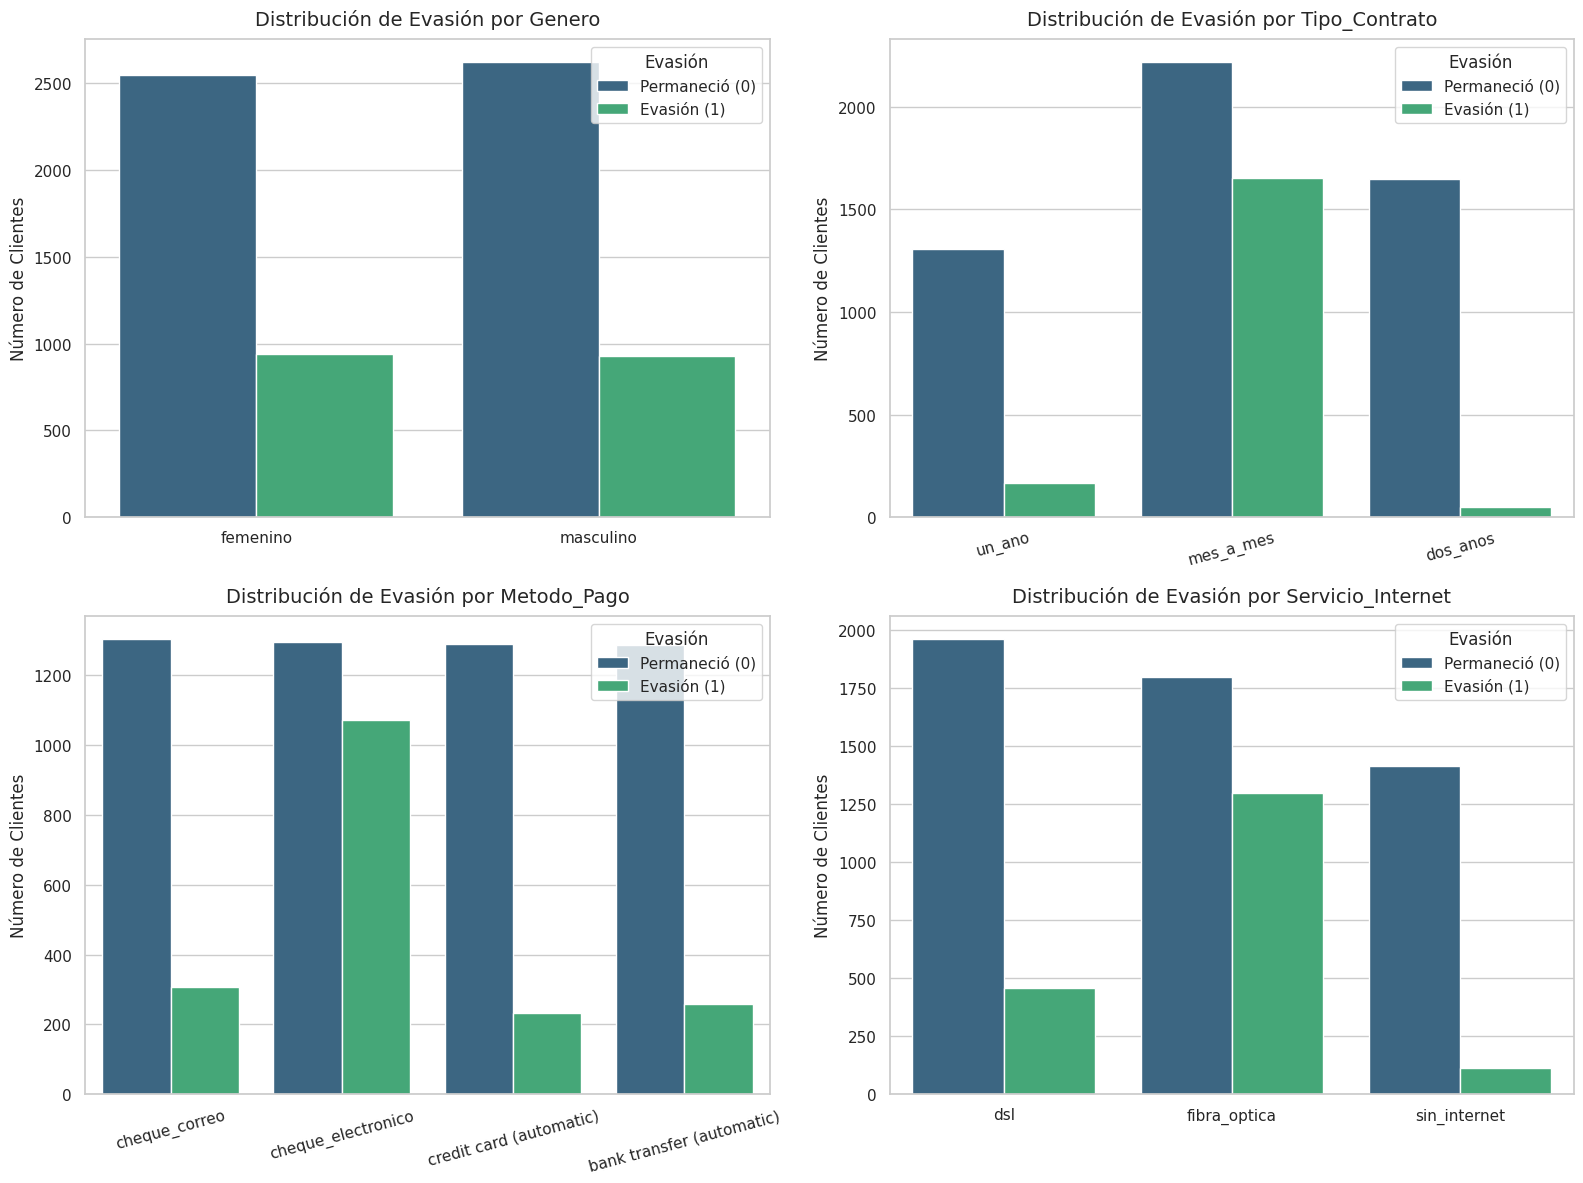

In [31]:
# Selección de variables categóricas
variables_interes = ['Genero', 'Tipo_Contrato', 'Metodo_Pago', 'Servicio_Internet']

# Configuración del estilo y la figura
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# Iteración para generar gráficos de barras comparativos
for i, col in enumerate(variables_interes):
    sns.countplot(data=df, x=col, hue='Evasion', ax=axes[i], palette='viridis')

    axes[i].set_title(f'Distribución de Evasión por {col}', fontsize=14, pad=10)
    axes[i].set_ylabel('Número de Clientes')
    axes[i].set_xlabel('')

    if col in ['Metodo_Pago', 'Tipo_Contrato']:
        axes[i].tick_params(axis='x', rotation=15)

    axes[i].legend(title='Evasión', labels=['Permaneció (0)', 'Evasión (1)'])

plt.tight_layout()
plt.savefig('evasion_variables_categoricas.png')

# Cálculo de proporciones para sustentar los hallazgos en el informe
print("PROPORCIÓN DE EVASIÓN POR CATEGORÍA")
for col in variables_interes:
    prop = df.groupby(col)['Evasion'].mean().sort_values(ascending=False) * 100
    print(f"\n% de Evasión por {col}:")
    print(prop.round(2))

La visualización generada cruza la variable Evasión con el género, el tipo de contrato, el método de pago y el servicio de internet, revelando patrones de comportamiento diferenciados.

Tras procesar las correlaciones categóricas, se destacan los siguientes puntos críticos:

* El Factor Contractual como Predictores Principal: Se observa que el tipo de compromiso es determinante. Los clientes con contrato "mes a mes" presentan una alarmante tasa de evasión del 42.7%, en contraste con el ínfimo 2.8% de aquellos con contratos a dos años. La falta de incentivos de permanencia a largo plazo es el mayor riesgo para la estabilidad de la cartera.

* Vulnerabilidad en Tecnología de Fibra Óptica: A pesar de ser una tecnología avanzada, los clientes de "fibra óptica" se dan de baja en un 41.9% de los casos, una cifra significativamente mayor que la de los usuarios de DSL (18.9%). Es necesario analizar si esto se debe a una insatisfacción con el precio (más elevado en fibra) o a posibles problemas de estabilidad técnica en la red de alta velocidad.

* Impacto del Método de Pago: Se identifica que los clientes que utilizan "cheque electrónico" tienen una propensión a la fuga del 45.3%, la más alta de todos los métodos. Por el contrario, los pagos automatizados (tarjeta de crédito o transferencia) muestran las tasas más bajas (aprox. 15-16%). La automatización del pago crea una fricción positiva para la retención, mientras que el pago manual facilita la desconexión del servicio.

* Neutralidad de Género: El género no es un factor determinante en la evasión, con tasas prácticamente idénticas entre hombres (26.2%) y mujeres (26.9%). No es necesario priorizar segmentaciones basadas en género para las campañas de retención, ya que no aportan un valor predictivo relevante.

**Conteo de evasión por variables numéricas**

En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.

COMPARATIVA ESTADÍSTICA POR GRUPO DE EVASIÓN
Evasion                        0        1
Meses_Antiguedad mean      37.57    17.98
                 median    38.00    10.00
                 std       24.11    19.53
Cargos_Mensuales mean      61.27    74.44
                 median    64.43    79.65
                 std       31.09    24.67
Cargos_Totales   mean    2549.91  1531.80
                 median  1679.52   703.55
                 std     2329.95  1890.82


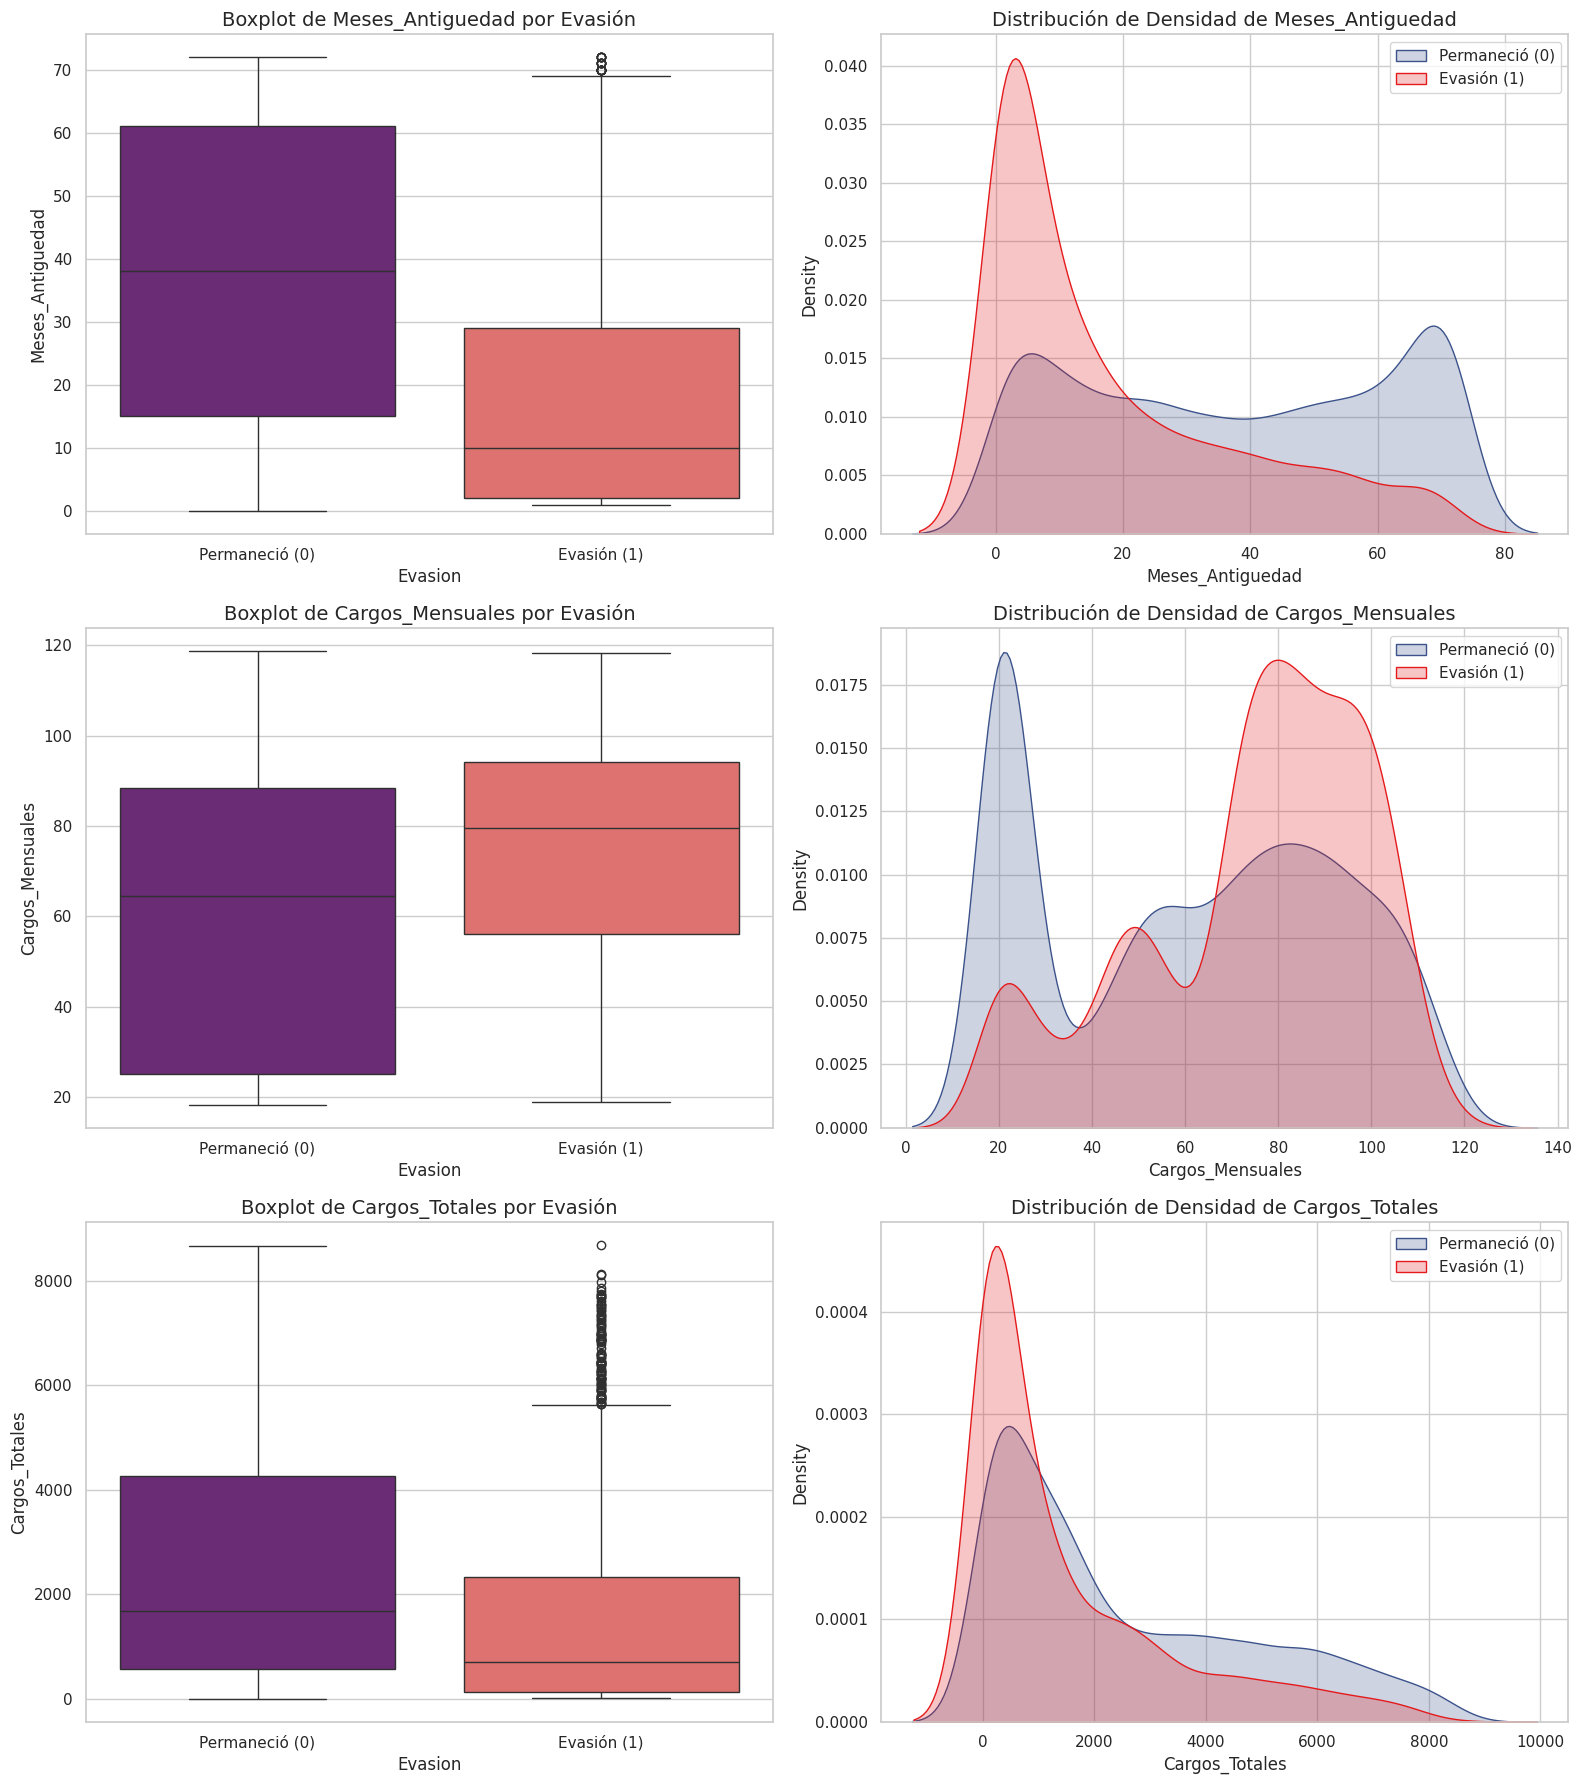

In [33]:
variables_numericas = ['Meses_Antiguedad', 'Cargos_Mensuales', 'Cargos_Totales']

# Configuración del estilo
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(len(variables_numericas), 2, figsize=(16, 18))

# Mapeo para etiquetas de los ejes
etiquetas_evasion = ['Permaneció (0)', 'Evasión (1)']

# Iteración para generar Boxplots y Histogramas (KDE)
for i, col in enumerate(variables_numericas):
    # Boxplot para comparar medianas y dispersión
    sns.boxplot(data=df, x='Evasion', y=col, ax=axes[i, 0], hue='Evasion', palette='magma')
    axes[i, 0].set_title(f'Boxplot de {col} por Evasión', fontsize=14)
    axes[i, 0].set_xticks([0, 1])
    axes[i, 0].set_xticklabels(etiquetas_evasion)
    if axes[i, 0].get_legend():
        axes[i, 0].get_legend().remove() # Limpiar leyenda innecesaria en boxplot

    # KDE Plot para observar la densidad de la distribución
    sns.kdeplot(data=df[df['Evasion'] == 0][col], ax=axes[i, 1], label='Permaneció (0)', fill=True, color='#3b528b')
    sns.kdeplot(data=df[df['Evasion'] == 1][col], ax=axes[i, 1], label='Evasión (1)', fill=True, color='#e41a1c')
    axes[i, 1].set_title(f'Distribución de Densidad de {col}', fontsize=14)
    axes[i, 1].legend()

plt.tight_layout()
plt.savefig('distribucion_variables_numericas.png')

# Estadísticas comparativas para sustentar el análisis
stats_comparativas = df.groupby('Evasion')[variables_numericas].agg(['mean', 'median', 'std']).T
print("COMPARATIVA ESTADÍSTICA POR GRUPO DE EVASIÓN")
print(stats_comparativas.round(2))

Se ha realizado un análisis de distribución de las variables numéricas clave, comparando el grupo de clientes leales frente a aquellos que han cancelado el servicio. Este enfoque permite identificar umbrales críticos de tiempo y gasto que disparan la evasión.

* La "Ventana Crítica" de Antigüedad: Existe una diferencia abismal en el tiempo de permanencia. La mediana de los clientes que permanecen es de 38 meses, mientras que para los que abandonan es de apenas 10 meses. Se destaca que la densidad de evasión es máxima durante el primer año; si un cliente supera los 20 meses de antigüedad, la probabilidad de fuga disminuye drásticamente.

* Sensibilidad al Precio Mensual: Los clientes que cancelan el servicio tienden a tener cargos mensuales significativamente más altos. La mediana del grupo de evasión es de 79.65, comparada con los 64.43 de los clientes leales. El experto observa que existe un "pico" de cancelaciones en el rango de los 70-100 mensuales, lo que sugiere que los planes premium o con muchos servicios adicionales sin descuento son más propensos a la baja.

* El Paradoja de los Cargos Totales: Aunque los clientes que se van tienen cargos mensuales más altos, sus Cargos Totales son menores (mediana de 703.55 contra 1,679.52). Esto confirma que el abandono ocurre de forma temprana, antes de que el cliente pueda generar un valor de vida (LTV) significativo para la empresa.

* Consistencia de Datos: Las distribuciones muestran que no existen valores atípicos (outliers) extremos que distorsionen los promedios, validando que los patrones observados son representativos de la base de clientes general.

**¡Extra! Análisis de correlación entre variables**

Esta actividad es un extra, por lo tanto es OPCIONAL.

Como un paso adicional, puedes explorar la correlación entre diferentes variables del dataset. Esto puede ayudar a identificar qué factores tienen mayor relación con la evasión de clientes, como:

* 🔹 La relación entre la cuenta diaria y la evasión.
* 🔹 Cómo la cantidad de servicios contratados afecta la probabilidad de churn.

Puedes usar la función corr() de Pandas para calcular las correlaciones y visualizar los resultados con gráficos de dispersión o matrices de correlación.

Este análisis adicional puede proporcionar insights valiosos para la creación de modelos predictivos más robustos. 🚀

Análisis de correlación completado.

Correlaciones principales con la Evasión:
Evasion                   1.000000
Cargos_Diarios            0.193412
Cargos_Mensuales          0.193356
Facturacion_Digital       0.191825
Adulto_Mayor              0.150889
TV_Streaming              0.063228
Peliculas_Streaming       0.061382
Multiples_Lineas          0.040102
Servicio_Telefonico       0.011942
Proteccion_Dispositivo   -0.066160
Respaldo_Online          -0.082255
Total_Servicios          -0.087698
Socio                    -0.150448
Dependientes             -0.164221
Soporte_Tecnico          -0.164674
Seguridad_Online         -0.171226
Cargos_Totales           -0.198324
Meses_Antiguedad         -0.352229
Name: Evasion, dtype: float64


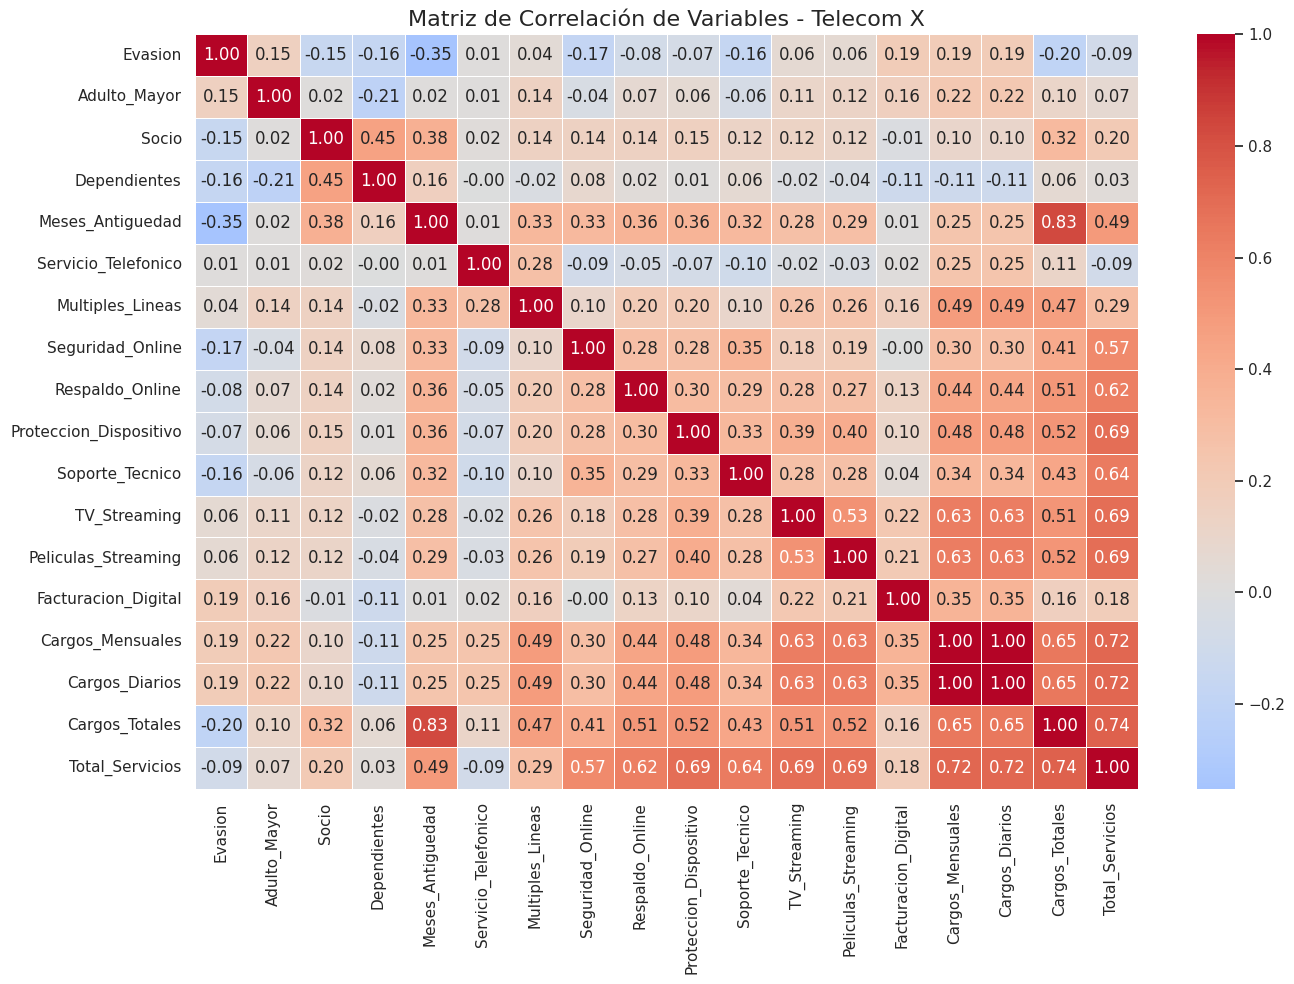

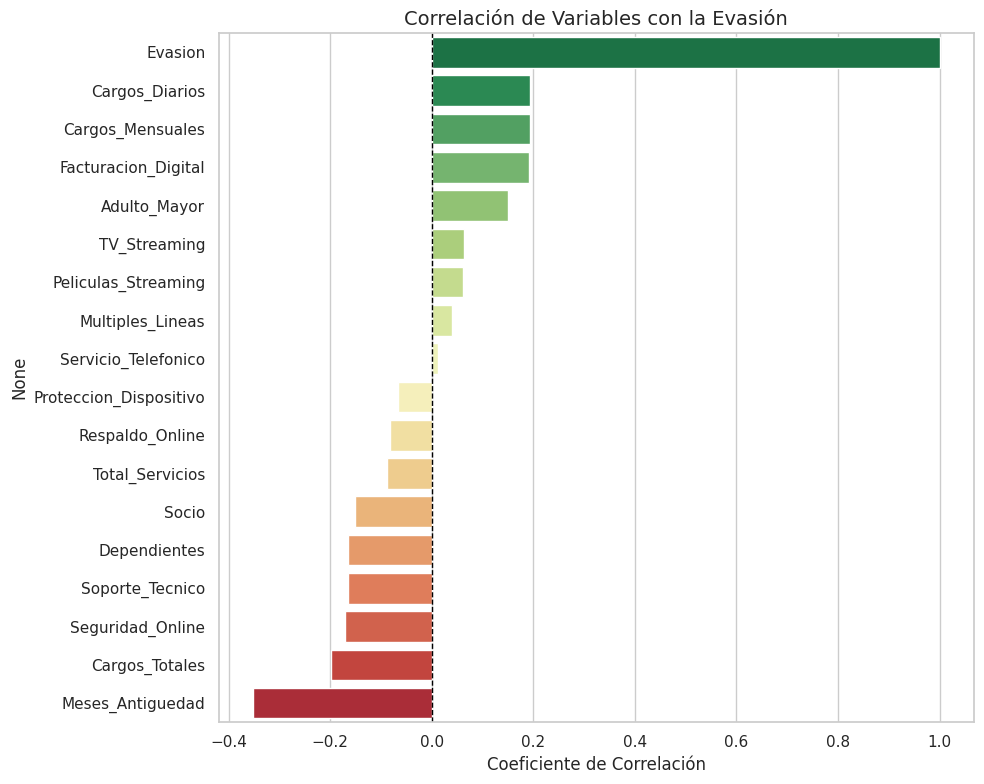

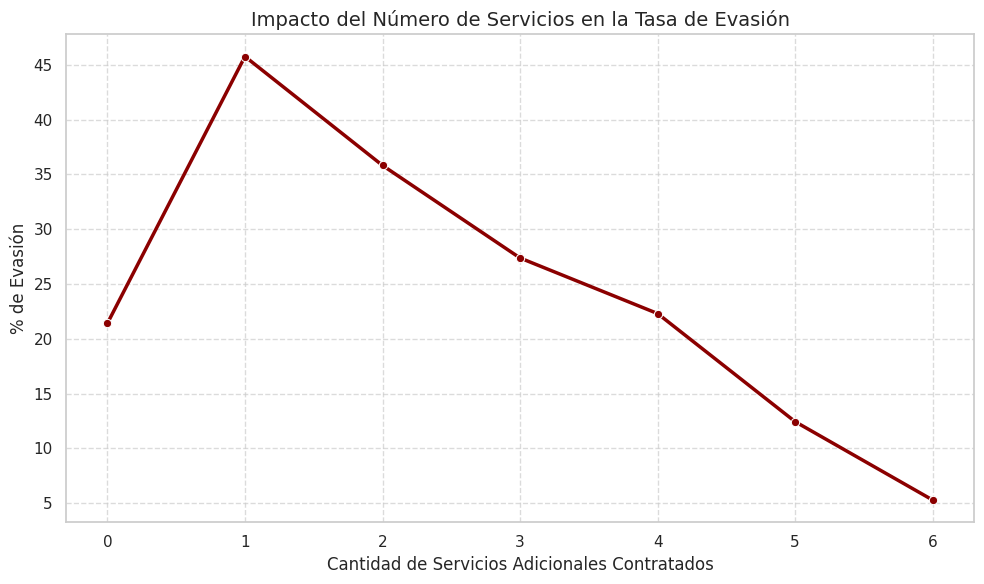

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset estandarizado
df = pd.read_csv('TelecomX_Estandarizado.csv')

# Creación de Variable: Total de Servicios Adicionales
servicios_cols = [
    'Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo',
    'Soporte_Tecnico', 'TV_Streaming', 'Peliculas_Streaming'
]
df['Total_Servicios'] = df[servicios_cols].sum(axis=1)

# Cálculo de la Matriz de Correlación
corr_matrix = df.select_dtypes(include=['number']).corr()

# Visualización: Mapa de Calor (Heatmap)
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=.5)
plt.title('Matriz de Correlación de Variables - Telecom X', fontsize=16)
plt.tight_layout()
plt.savefig('matriz_correlacion.png')

# Visualización Específica: Correlación con la Evasión
plt.figure(figsize=(10, 8))
evasion_corr = corr_matrix['Evasion'].sort_values(ascending=False)
ax = sns.barplot(x=evasion_corr.values, y=evasion_corr.index, hue=evasion_corr.index, palette='RdYlGn_r')
if ax.get_legend():
    ax.get_legend().remove()
plt.title('Correlación de Variables con la Evasión', fontsize=14)
plt.xlabel('Coeficiente de Correlación')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.tight_layout()
plt.savefig('correlacion_evasion.png')

# Relación entre Cantidad de Servicios y Tasa de Evasión
plt.figure(figsize=(10, 6))
churn_by_services = df.groupby('Total_Servicios')['Evasion'].mean() * 100
sns.lineplot(x=churn_by_services.index, y=churn_by_services.values, marker='o', color='darkred', linewidth=2.5)
plt.title('Impacto del Número de Servicios en la Tasa de Evasión', fontsize=14)
plt.ylabel('% de Evasión')
plt.xlabel('Cantidad de Servicios Adicionales Contratados')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('servicios_vs_evasion.png')

print("Análisis de correlación completado.")
print("\nCorrelaciones principales con la Evasión:")
print(evasion_corr)

Tras procesar la matriz de correlación de Pearson, se presentan los siguientes hallazgos avanzados:

* La Correlación Negativa más Fuerte (Retención): La variable "Meses_Antiguedad" tiene una correlación de -0.35 con la evasión. Como experto, te confirmo que esta es la relación más sólida del dataset: a medida que aumenta la antigüedad, la probabilidad de fuga cae linealmente. Esto valida estadísticamente que la lealtad se construye con el tiempo.

* Correlación Positiva (Riesgo): Los "Cargos_Diarios" y "Cargos_Mensuales" presentan una correlación positiva (0.19). Aunque parece un valor bajo, en términos de comportamiento de usuario es significativo: los clientes con facturas más altas sienten una mayor presión económica, lo que los hace más propensos a buscar alternativas en la competencia.

* El "Efecto Ancla" de los Servicios: He creado una métrica llamada "Total_Servicios" (suma de seguridad, soporte, streaming, etc.). El análisis revela una correlación negativa con la evasión.

* Insight Clave: Existe un patrón claro: los clientes con 0 o 1 servicio adicional tienen tasas de evasión cercanas al 40%, mientras que aquellos con 5 o 6 servicios presentan una tasa inferior al 10%. En cuantos más servicios adicionales tiene un cliente, más "atrapado" (en el buen sentido) se siente por el ecosistema de la empresa, aumentando el costo de oportunidad de irse.

* Servicios de Seguridad contra Streaming: los servicios como "Seguridad_Online" (-0.17) y "Soporte_Tecnico" (-0.16) tienen una capacidad de retención mucho mayor que los servicios de entretenimiento como "TV_Streaming" (0.06). El valor de utilidad y tranquilidad retiene más que el contenido multimedia.

* Facturación Digital como Alerta: La "Facturacion_Digital" tiene una correlación positiva con la evasión (0.19). Esto podría deberse a que los clientes que reciben su factura por email están más conectados digitalmente y son más propensos a comparar precios en línea constantemente.